# Decision Trees


* Decision Trees builds classification or regression models in the form of tree structure
* It breaks down a dataset into smaller and smaller subsets while at the same time an associated tree is increamently developed
* The final result is a tree with decision nodes and leaf nodes
* Top most node is call root node
* Partioning takes place in a manner that subset contains the most similar values(homegenous)

### Advantages 

* Decision trees can be used to predict both continuous and discrete values i.e. they work well for both regression and classification tasks.
* They require relatively less effort for training the algorithm.
* They can be used to classify non-linearly separable data.
* They're very fast and efficient compared to KNN and other classification algorithms

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Decsion Tree for Classification 

In [60]:
df=pd.read_csv('currency_note_data.csv')

In [61]:
df.shape

(1372, 5)

In [62]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [63]:
df.count()

Variance    1372
Skewness    1372
Curtosis    1372
Entropy     1372
Class       1372
dtype: int64

In [64]:
#number of fraud cases
df.Class.value_counts()

0    762
1    610
Name: Class, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
from sklearn.tree import DecisionTreeClassifier


In [67]:
X = df.drop('Class', axis=1)  
y = df['Class']

In [68]:
X.head()


,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [69]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

## Train Test Split

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=30)

In [71]:
X_train.shape

(960, 4)

In [72]:
X_test.shape

(412, 4)

In [73]:
y_train.shape

(960,)

In [74]:
y_test.shape

(412,)

## Build Decision Tree Classifier

In [75]:
c=DecisionTreeClassifier().fit(X_train,y_train)

## Accuracy of Decision Tree

In [76]:
#accuracy on Training dataset
c.score(X_train,y_train)

1.0

In [77]:
#accuracy on test dataset
c.score(X_test,y_test)

0.9854368932038835

### Confusion Matrix

In [22]:
from sklearn.metrics import classification_report

In [23]:
#prediction on test data
y_preds = c.predict(X_test)

In [24]:
print(classification_report(y_test,y_preds))

             precision    recall  f1-score   support

          0       0.99      0.97      0.98       223
          1       0.97      0.99      0.98       189

avg / total       0.98      0.98      0.98       412



In [25]:
from sklearn.metrics import roc_curve, auc

0.98125607991078845

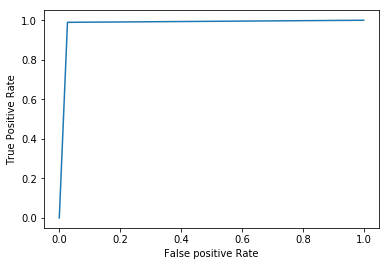

In [26]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds)

#plot roc curve
plt.plot(false_positive_rate,true_positive_rate)
plt.xlabel("False positive Rate")
plt.ylabel("True Positive Rate")

roc_auc = auc(false_positive_rate, true_positive_rate)

roc_auc

## Hyper parameter tunning

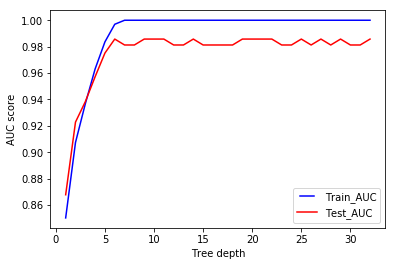

In [27]:
#create values between 1 and 32 ( min and max range of decision trees)
max_depths = np.linspace(1, 32, 32, endpoint=True)
#create empty vectors to contain model results for each of the max depth values
train_results = []
test_results = []
for max_depth in max_depths:
   # for each value of max length ,build and train  a decision tree classifier
   c = DecisionTreeClassifier(max_depth=max_depth)
   # for each value of max length ,fit the decision tree classifier on training dataset
   c.fit(X_train, y_train)
    # make predictions on training datatset
   train_pred = c.predict(X_train)
    #calculate fpr,tpr from training predictions
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    # calculate roc values for train dataset
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
    #predict on test data
   y_preds =c.predict(X_test)
   #calculate fpr,tpr from test predictions
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds)
   # calculate roc values for test dataset
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
    
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths,train_results,'b',label="Train_AUC")
line2, = plt.plot(max_depths, test_results,'r', label="Test_AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

So, we can chose max_depth as 6 or 7

In [28]:
c=DecisionTreeClassifier(max_depth=6).fit(X_train,y_train)
print(c.score(X_train,y_train))
print(c.score(X_test,y_test))

0.996875
0.985436893204


In [29]:
#prediction on test data
y_preds = c.predict(X_test)
print(classification_report(y_test,y_preds))

             precision    recall  f1-score   support

          0       0.99      0.98      0.99       223
          1       0.98      0.99      0.98       189

avg / total       0.99      0.99      0.99       412



Our precision rate also increased from 98 % to 99 %

## Decision Tree for Regression 

In [30]:
data=pd.read_csv('petrol_consumption.csv')

In [31]:
data.shape

(48, 5)

In [32]:
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
Petrol_tax                      48 non-null float64
Average_income                  48 non-null int64
Paved_Highways                  48 non-null int64
Population_Driver_licence(%)    48 non-null float64
Petrol_Consumption              48 non-null int64
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [35]:
data.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [36]:
X = data.drop('Petrol_Consumption', axis=1)  
y = data['Petrol_Consumption']

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=30)

In [39]:
# import Decision tree Regressor
from sklearn.tree import DecisionTreeRegressor

In [40]:
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [41]:
regressor.score(X_test,y_test)

0.17962297589793597

In [42]:
y_pred = regressor.predict(X_test) 

In [43]:
pred_df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred}) 

In [44]:
pred_df

,Actual,Predicted
40,587,610.0
32,577,631.0
21,540,457.0
42,632,610.0
19,640,510.0
10,580,464.0
24,460,510.0
31,554,571.0
20,649,865.0
39,968,782.0


In [46]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 87.3333333333
Mean Squared Error: 12099.6666667
Root Mean Squared Error: 109.998484838
